In [1]:
import yt, json
import matplotlib.pyplot as plt
from analysis_helpers import *



C:\Users\azton\Anaconda3\envs\deepai\lib\_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]
C:\Users\azton\Anaconda3\envs\deepai\lib\site-packages\yt\fields\local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


In [2]:
with open('./radial_plots/radiuslog.json', 'r') as f:
    rq = json.load(f)


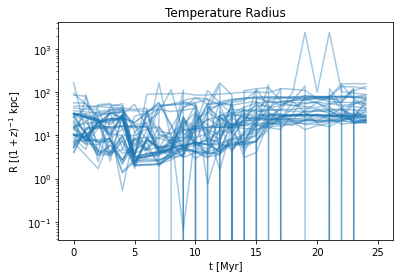

In [12]:
fig, ax = plt.subplots()
for k in rq: #iterate particle indices that were logged
    ax.plot(rq[k]['time'], rq[k]['temperature_radius'], alpha=0.4, color='tab:blue')
    ax.set_yscale('log')
    # ax.set_ylim(0.0, max(rq[k]['p3_metallicity_radius']))
ax.set_title('Temperature Radius')
ax.set_ylabel('R [$(1+z)^{-1}$ kpc]')
ax.set_xlabel('t [Myr]')
plt.savefig('phx256-1_temp_rad.png')

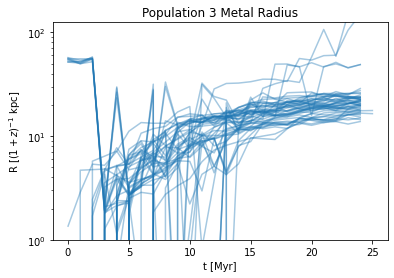

In [13]:
fig, ax = plt.subplots()
for k in rq: #iterate particle indices that were logged
    ax.plot(rq[k]['time'], rq[k]['p3_metallicity_radius'], alpha=0.4, color='tab:blue')
    ax.set_yscale('log')
ax.set_title('Population 3 Metal Radius')
ax.set_xlabel('t [Myr]')
ax.set_ylabel('R [$(1+z)^{-1}$ kpc]')
ax.set_ylim(1, 125)
plt.savefig('phx256-1_p3z_radius.png')